In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as datetime
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

**CARGA DE DATOS**
=====================

In [3]:
postulantesEducacion=pd.read_csv('/home/sherly/Escritorio/datos_navent_fiuba/fiuba_1_postulantes_educacion.csv',low_memory=False)
postulantesGeneroYEdad=pd.read_csv('/home/sherly/Escritorio/datos_navent_fiuba/fiuba_2_postulantes_genero_y_edad.csv',low_memory=False)
vistas=pd.read_csv('/home/sherly/Escritorio/datos_navent_fiuba/fiuba_3_vistas.csv',low_memory=False)
postulaciones=pd.read_csv('/home/sherly/Escritorio/datos_navent_fiuba/fiuba_4_postulaciones.csv',low_memory=False)
avisosOnline=pd.read_csv('/home/sherly/Escritorio/datos_navent_fiuba/fiuba_5_avisos_online.csv',low_memory=False)
avisosDetalle=pd.read_csv('/home/sherly/Escritorio/datos_navent_fiuba/fiuba_6_avisos_detalle.csv',low_memory=False)

** Merge entre los archivos:**
============================

** 1. Educacion, genero y edad de los postulantes**

In [4]:
postulantes = pd.merge(postulantesEducacion, postulantesGeneroYEdad, on='idpostulante', how='outer')
postulantes.tail()

,idpostulante,nombre,estado,fechanacimiento,sexo
310362,mzdNo99,NaN,NaN,1999-08-10,FEM
310363,Nzr1J34,NaN,NaN,NaN,NO_DECLARA
310364,JBrNMNk,NaN,NaN,1997-01-11,MASC
310365,2zP6Jd0,NaN,NaN,1997-03-06,FEM
310366,2zP6J9V,NaN,NaN,NaN,NO_DECLARA


**2. AvisosOnline y avisosDetalle, asi generan un solo archivo de avisos**

In [5]:
avisos = pd.merge(avisosOnline, avisosDetalle, on='idaviso', how='outer')
avisos.tail()

,idaviso,idpais,titulo,descripcion,nombre_zona,ciudad,mapacalle,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa
13844,1112342204,1.0,Ejecutivo de Ventas - Prov. de Bs. As e Interi...,"<p>Editorial Rubinzal Culzoni, líder en el ámb...",Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Ventas,Rubinzal Editorial
13845,1112341862,1.0,24 Feb - Chief Software Architect ($100K/yr) -...,<p>Para inscribirse en el torneo debe ingresar...,Gran Buenos Aires,NaN,NaN,Teletrabajo,Jefe / Supervisor / Responsable,Tecnologia / Sistemas,CrossOver
13846,1112341899,1.0,24 Feb - Customer Support Manager ($100K/yr) -...,<p>Para inscribirse en el torneo debe ingresar...,Gran Buenos Aires,NaN,NaN,Teletrabajo,Jefe / Supervisor / Responsable,Soporte Técnico,CrossOver
13847,1112341992,1.0,24 Feb - VP of Customer Support ($200K/yr) - O...,<p>Para inscribirse en el torneo debe ingresar...,Gran Buenos Aires,NaN,NaN,Teletrabajo,Jefe / Supervisor / Responsable,Atención al Cliente,CrossOver
13848,1112342193,1.0,Supervisor de Mantenimiento,"<p>Nuestro cliente, un importante PYME dedicad...",Gran Buenos Aires,NaN,NaN,Full-time,Jefe / Supervisor / Responsable,Mantenimiento,VF CONSULTING


**VISUALIZACIONES**
===================
**_1. Hora con mayor y menor cantidad de vistas_**
=====================================================
* Verificacion de la calidad de datos

In [7]:
vistas.dtypes

idAviso          int64
timestamp       object
idpostulante    object
dtype: object

In [8]:
vistas.timestamp.value_counts()

2018-02-26T12:22:26.834-0500    3
2018-02-28T18:13:14.254-0500    3
2018-02-27T10:14:18.766-0500    3
2018-02-26T06:24:30.660-0500    3
2018-02-26T09:52:20.019-0500    3
2018-02-24T09:49:12.766-0500    3
2018-02-24T15:00:08.930-0500    3
2018-02-27T19:07:04.485-0500    2
2018-02-26T15:55:26.480-0500    2
2018-02-26T07:43:50.674-0500    2
2018-02-28T14:35:24.598-0500    2
2018-02-27T07:32:01.659-0500    2
2018-02-26T16:04:47.928-0500    2
2018-02-26T15:06:40.591-0500    2
2018-02-26T09:57:05.983-0500    2
2018-02-24T17:06:29.971-0500    2
2018-02-28T14:33:25.544-0500    2
2018-02-26T11:16:59.345-0500    2
2018-02-28T13:01:16.145-0500    2
2018-02-27T18:24:04.504-0500    2
2018-02-28T20:45:38.636-0500    2
2018-02-26T09:22:02.331-0500    2
2018-02-26T10:06:04.997-0500    2
2018-02-26T18:55:45.041-0500    2
2018-02-27T11:05:40.326-0500    2
2018-02-26T21:15:46.531-0500    2
2018-02-27T21:35:57.763-0500    2
2018-02-27T15:43:05.300-0500    2
2018-02-26T10:02:18.812-0500    2
2018-02-26T14:

In [9]:
vistas.isnull().any()

idAviso         False
timestamp       False
idpostulante    False
dtype: bool

* Se agregan la columnas dia, mes, año y hora

In [10]:
# Convertimos año, mes, dia de la semana y hora
import calendar
vistas['timestamp'] = pd.to_datetime(vistas['timestamp'])
vistas['Anio'] = vistas['timestamp'].map(lambda x:x.year)
vistas['Mes'] = vistas['timestamp'].map(lambda x:x.month)
vistas['Dia'] = vistas['timestamp'].map(lambda x:x.weekday_name)
vistas['Hora'] = pd.to_datetime(vistas['timestamp'], format='%H:%M',errors='coerce').dt.hour


* Despreciamos el mes de 3, ya que la cantidad de vistas son muy chicas a comparacion a las del mes 2

In [11]:
vistas.Mes.value_counts()

2    921074
3     40823
Name: Mes, dtype: int64

In [12]:
vistasFebrero= vistas[vistas.Mes==2]
vistasFebrero.tail()

,idAviso,timestamp,idpostulante,Anio,Mes,Dia,Hora
926019,1112352879,2018-02-28 23:59:43.373,vV9BGbE,2018,2,Wednesday,23
926020,1112303807,2018-02-28 23:59:46.717,ZD8QEXE,2018,2,Wednesday,23
926021,1112322670,2018-02-28 23:59:50.148,bOj3ojq,2018,2,Wednesday,23
926022,1112347283,2018-02-28 23:59:53.949,ZDNJzJE,2018,2,Wednesday,23
926023,1112316657,2018-02-28 23:59:59.935,owavZOL,2018,2,Wednesday,23


* Eliminamos las columnas con la que no vamos a trabajar

In [13]:
vistasFebrero.drop(["timestamp"],axis=1,inplace=True)
vistasFebrero.tail()

,idAviso,idpostulante,Anio,Mes,Dia,Hora
926019,1112352879,vV9BGbE,2018,2,Wednesday,23
926020,1112303807,ZD8QEXE,2018,2,Wednesday,23
926021,1112322670,bOj3ojq,2018,2,Wednesday,23
926022,1112347283,ZDNJzJE,2018,2,Wednesday,23
926023,1112316657,owavZOL,2018,2,Wednesday,23


In [14]:
vistasFebrero.isnull().any()

idAviso         False
idpostulante    False
Anio            False
Mes             False
Dia             False
Hora            False
dtype: bool

In [15]:
vistasFebreroPorHora=vistasFebrero

grouped = vistasFebreroPorHora.loc[:,['Hora','idAviso']].groupby('Hora').agg(['count'])
top_vistas = grouped[('idAviso','count')].sort_values(ascending=True)
top_vistas

Hora
8      4445
7      4550
9      5957
6      7487
5     11966
4     17512
10    18679
3     28553
2     31818
1     34463
0     36136
11    36364
12    50213
22    51527
23    51656
21    53928
17    54704
16    56415
18    56568
20    58042
19    59214
13    60972
15    63737
14    66168
Name: (idAviso, count), dtype: int64

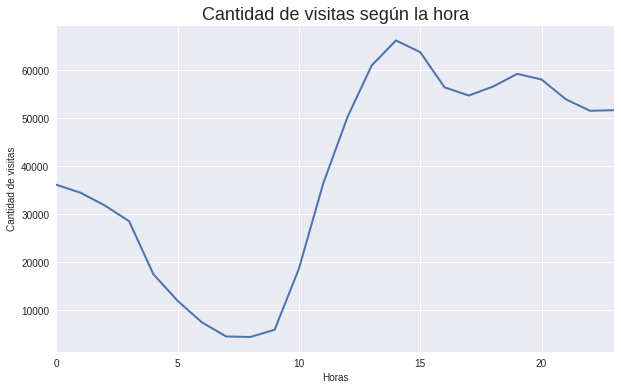

In [16]:
vistasFebreroPorHora=vistasFebrero

top_vistas = vistasFebreroPorHora.groupby('Hora').count().loc[:,'idAviso'].plot(linewidth=2,figsize=(10,6));

top_vistas.set_title("Cantidad de visitas según la hora", fontsize=18)
top_vistas.set_ylabel("Cantidad de visitas", fontsize=10)
top_vistas.set_xlabel("Horas", fontsize=10)

## **Conclusión:**
### Se registra que el horario con mayor visitas es a las 14 hs y el de menor visitas a las 8 hs. 


**_2.Día de la semana con mayor y menor cantidad de visitas_**
==============================================================

In [17]:
vistasFebreroPorDia=vistasFebrero

grouped = vistasFebreroPorDia.loc[:,['Dia','idAviso']].groupby('Dia').agg(['count'])
top_vistas = grouped[('idAviso','count')].sort_values(ascending=True)
top_vistas

Dia
Friday        47236
Sunday        90646
Saturday      95930
Wednesday    227160
Monday       227957
Tuesday      232145
Name: (idAviso, count), dtype: int64

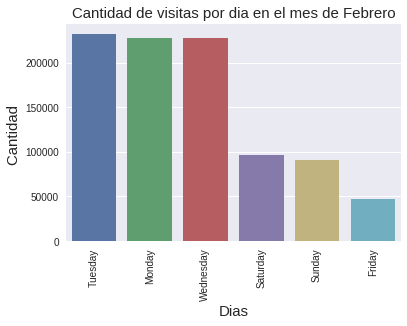

In [18]:
visualizacionVistasPorDia=vistasFebrero

g = sns.countplot(x='Dia', data=visualizacionVistasPorDia, order=visualizacionVistasPorDia['Dia'].value_counts().index, orient='v')
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_xlabel("Dias", fontsize=15)
g.set_ylabel("Cantidad ", fontsize=15)
g.set_title("Cantidad de visitas por dia en el mes de Febrero", fontsize=15)

## **Conclusión:**
### Se registra que el día con mayor visitas es el martes y el de menor es el viernes. De ello se puede decir que los postulantes estipulan que el día que lunes es cuando se publica la oferta laboral

**_3.Empresas con mayor y menor cantidad de postulaciones_**
==============================================================

In [19]:
dataframe2= pd.merge(avisos,postulaciones, on='idaviso', how='inner')
empresas=dataframe2[['idaviso','denominacion_empresa']]
empresas.dropna(subset=['denominacion_empresa'],inplace=True)
empresas.isnull().sum()

idaviso                 0
denominacion_empresa    0
dtype: int64

In [20]:
grouped = empresas.loc[:,['denominacion_empresa','idaviso']].groupby('denominacion_empresa').agg(['count'])
top10_empresas = grouped[('idaviso','count')].sort_values(ascending=False)
top10_empresas.head(10)

denominacion_empresa
Manpower                              119013
RANDSTAD                              102640
Grupo Gestión                          89950
Adecco -Región Office                  83530
Assistem                               68125
Farmacity                              57583
BAYTON                                 55048
BBVA Francés                           54805
Pullmen Servicios Empresarios S.A.     51471
Adecco - Región NORTE & OESTE GBA      45912
Name: (idaviso, count), dtype: int64

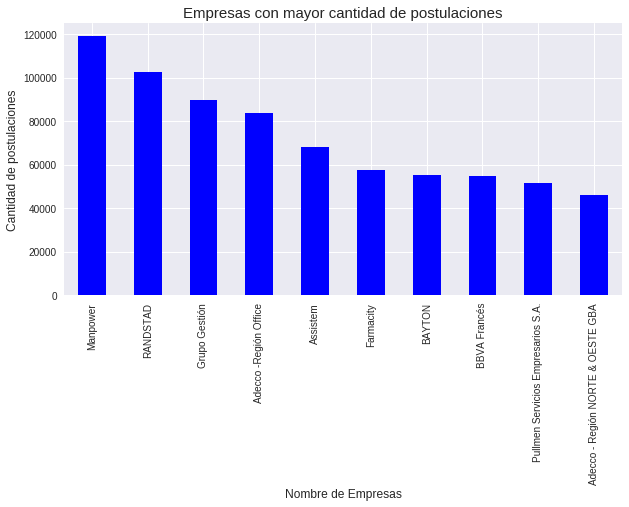

In [21]:
empresas.groupby('denominacion_empresa')['idaviso'].count().sort_values(ascending = False)[0:10].plot(kind='bar',rot = 90,figsize=(10,5),color='blue',fontsize=10)

plt.title('Empresas con mayor cantidad de postulaciones', fontsize=15);
plt.xlabel('Nombre de Empresas', fontsize=12);
plt.ylabel('Cantidad de postulaciones', fontsize=12);

## **Conclusión:**
### Se regista mayor postulaciones con Manpower, esto se debe a su amplia oferta laboral 

 **_4. Las 10 mejores areas que tienen la mayor cantidad de publicacion en ofertas laborales_**
 ==========================================================================================

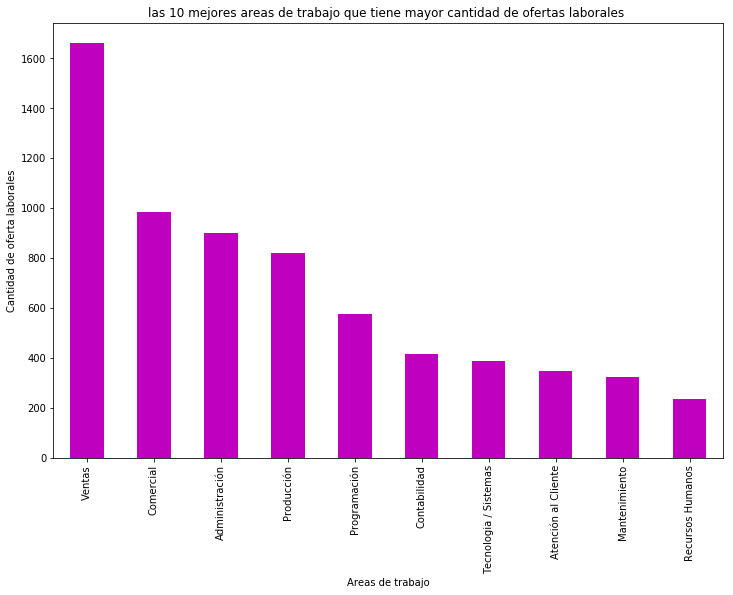

In [20]:
f = plt.figure()
avisos_areaTrabajo=avisos[['idaviso','nombre_area']]
grafhist = avisos_areaTrabajo['nombre_area'].value_counts().sort_values(ascending=False).head(10)
#grafhist
plt.title('las 10 mejores areas de trabajo que tiene mayor cantidad de ofertas laborales ', color='black')

ax=grafhist.plot(kind='bar',rot=90,figsize=(12,8),color='m');
ax.set_ylabel('Cantidad de oferta laborales');
ax.set_xlabel('Areas de trabajo');

## **Conclusión:**
### Como podemos observar el area de Ventas, es la mayor area que ofrece a nuestros postulados una oportunidad de encontrar empleo,

**5. Las 10 mejores areas que tienen mayor postulación**
=====================================================

In [21]:
#verificamos que no existe ningun tipo de nan's
agrup_postulaciones=postulaciones [['idaviso','idpostulante']]
aviso_cant=agrup_postulaciones.groupby(['idaviso']).count().sort_values(by=['idpostulante'],ascending=False).reset_index()
aviso_cant.rename(columns={'idpostulante':'cantPostulantes'},inplace=True)
aviso_cant.head(10)

,idaviso,cantPostulantes
0,1112033906,9932
1,1112334791,9787
2,1112204682,9244
3,1112094756,8763
4,1112345900,8304
5,1112319451,8025
6,1112298966,7637
7,1112262494,7541
8,1112305277,7153
9,1112296264,6968


In [22]:
aviso_cant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12692 entries, 0 to 12691
Data columns (total 2 columns):
idaviso            12692 non-null int64
cantPostulantes    12692 non-null int64
dtypes: int64(2)
memory usage: 198.4 KB


In [23]:
aviso_area=avisos[['idaviso','nombre_area']]
aviso_area.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13849 entries, 0 to 13848
Data columns (total 2 columns):
idaviso        13849 non-null int64
nombre_area    13534 non-null object
dtypes: int64(1), object(1)
memory usage: 324.6+ KB


In [24]:
#eliminar los null 
aviso_area.dropna(inplace=True)
aviso_area.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13534 entries, 0 to 13848
Data columns (total 2 columns):
idaviso        13534 non-null int64
nombre_area    13534 non-null object
dtypes: int64(1), object(1)
memory usage: 317.2+ KB


In [25]:
result = pd.merge(aviso_cant,aviso_area,on='idaviso',how='outer')
#quedo con las columnas de cantPostulantes y nombre_area
postulantes_area=result[['cantPostulantes','nombre_area']]  
postulantes_area=postulantes_area.groupby('nombre_area').\
                   agg([np.sum]).sort_values(('cantPostulantes','sum'),ascending=False)[:10]

postulantes_area

,cantPostulantes
,sum
nombre_area,
Ventas,408148.0
Administración,291135.0
Producción,277089.0
Comercial,216677.0
Atención al Cliente,195636.0
Recepcionista,137485.0
Call Center,126430.0
Telemarketing,87506.0


<Figure size 432x288 with 0 Axes>

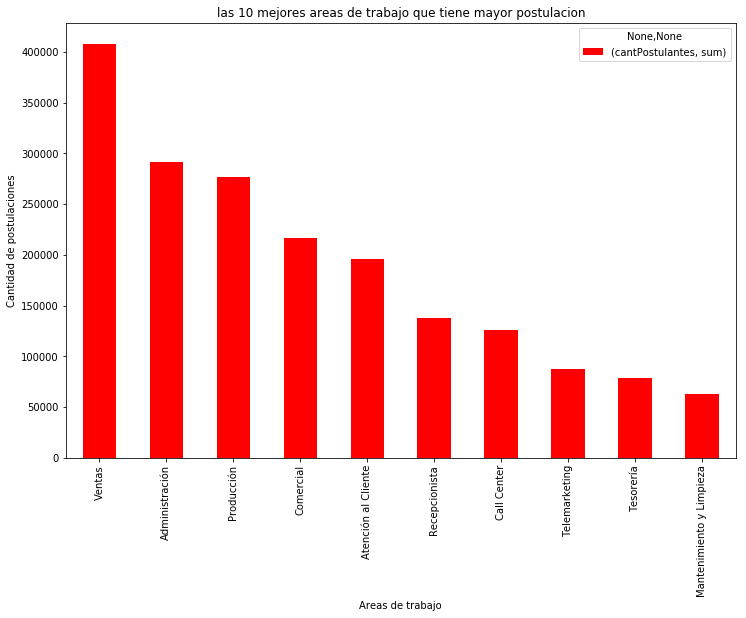

In [26]:
f= plt.figure()
graf = postulantes_area

ax=graf.plot(kind='bar',rot=90,figsize=(12,8),color='r');
ax.set_ylabel('Cantidad de postulaciones');
ax.set_xlabel('Areas de trabajo');
ax.set_title('las 10 mejores areas de trabajo que tiene mayor postulacion', color='black')
plt.show()

## **Conclusion:**
### Los postulantes, postularan a los puestos que mayor ofrecimiento laboral tengan y mayor sea la posibilidad de encontrae un puesto de trabajo 

**6. Genero de los postulantes para las distintas areas**
=======================================================

In [27]:
postulantesGeneroYEdad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200888 entries, 0 to 200887
Data columns (total 3 columns):
idpostulante       200888 non-null object
fechanacimiento    196138 non-null object
sexo               200888 non-null object
dtypes: object(3)
memory usage: 4.6+ MB


In [28]:
# me quedo con los id de los postulantes con sus respectivos generos 
postulante_genero=postulantesGeneroYEdad[['idpostulante','sexo']]
postulante_aviso=postulaciones[['idaviso','idpostulante']]
aviso_area=avisos[['idaviso','nombre_area']]

In [29]:
agrupando_aviso= pd.merge(aviso_area,postulante_aviso,on='idaviso',how='outer')
agrupando_aviso.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3403927 entries, 0 to 3403926
Data columns (total 3 columns):
idaviso         int64
nombre_area     object
idpostulante    object
dtypes: int64(1), object(2)
memory usage: 103.9+ MB


In [30]:
agrupando_postulante=pd.merge(agrupando_aviso,postulante_genero,on='idpostulante',how='outer')
agrupando_postulante.tail()

,idaviso,nombre_area,idpostulante,sexo
3403922,1112308336,Ingeniería de Producto,NzNaAll,MASC
3403923,1112250944,Mantenimiento,NzNaAll,MASC
3403924,1112261261,Mantenimiento,NzNaAll,MASC
3403925,1112268019,Producción,NzNaAll,MASC
3403926,1112310594,NaN,NzNaAll,MASC


In [31]:
agrupando_genero=agrupando_postulante[['nombre_area','sexo']]
agrupando_genero.dropna(inplace=True)
agrupando_genero.tail()

,nombre_area,sexo
3403921,Mineria/Petroleo/Gas,MASC
3403922,Ingeniería de Producto,MASC
3403923,Mantenimiento,MASC
3403924,Mantenimiento,MASC
3403925,Producción,MASC


In [32]:
grupArea_genero=agrupando_genero
grupArea_genero['pivot']=1
grupArea_genero.tail()

,nombre_area,sexo,pivot
3403921,Mineria/Petroleo/Gas,MASC,1
3403922,Ingeniería de Producto,MASC,1
3403923,Mantenimiento,MASC,1
3403924,Mantenimiento,MASC,1
3403925,Producción,MASC,1


* Armo una tabla con los nombre de area y sus respectivos genero(femenino masculino y no_declara)

In [33]:
grupArea_genero=grupArea_genero.pivot_table(values='pivot',index='nombre_area',columns='sexo',aggfunc=np.sum)
grupArea_genero=grupArea_genero.sort_values(by=['FEM','MASC','NO_DECLARA'],ascending=False)[:20]
grupArea_genero

sexo,FEM,MASC,NO_DECLARA
nombre_area,,,
Ventas,229674.0,172813.0,5661.0
Administración,170082.0,118377.0,2676.0
Recepcionista,125446.0,10716.0,1323.0
Atención al Cliente,120674.0,72786.0,2176.0
Comercial,111656.0,102438.0,2583.0
Call Center,84383.0,40505.0,1542.0
Telemarketing,55845.0,30455.0,1206.0
Tesorería,47126.0,30394.0,930.0
Producción,45077.0,227363.0,4649.0


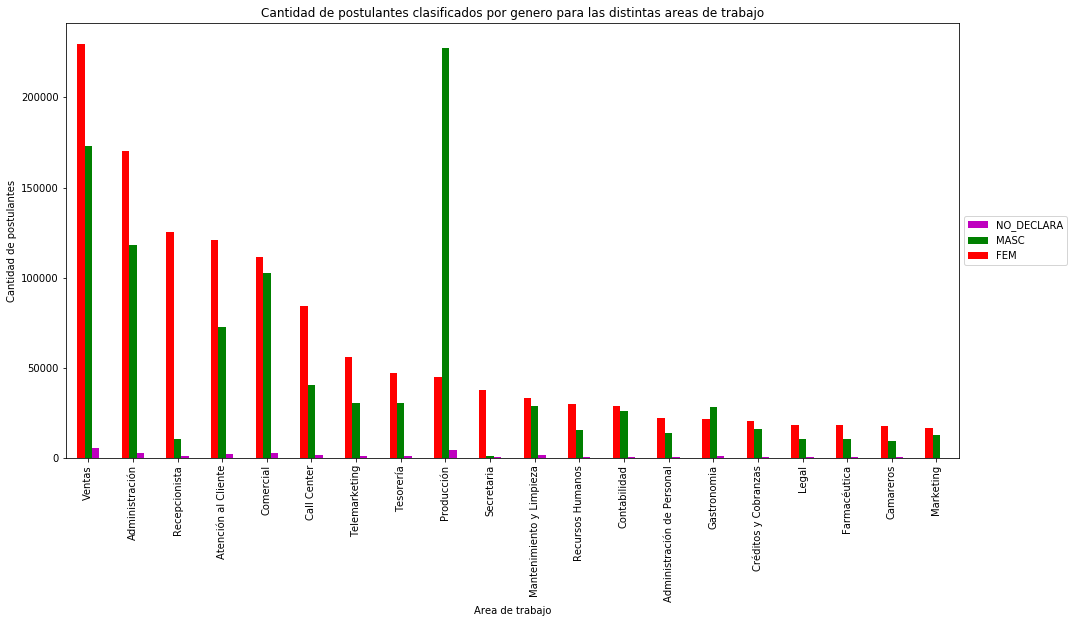

In [34]:
f = plt.figure()

ax = grupArea_genero.plot(kind='bar', stacked=False,figsize=(16,8),ax=f.gca(), color=['r','g','m'])
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1],loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.set_ylabel('Cantidad de postulantes');
ax.set_xlabel('Area de trabajo');
ax.set_title('Cantidad de postulantes clasificados por genero para las distintas areas de trabajo', color='black')
plt.show()

In [35]:
## **Conclusión:**
### podemos ver que la cantidad de genero no declarados son en definitiva despreciados en cantidad con respecto al los otros gener

**7. Postulaciones por cada dia de la semana durante ENERO y FEBRERO**
===================================================================

In [22]:
grup_postulaciones=postulaciones
grup_postulaciones['fechapostulacion']=pd.to_datetime(grup_postulaciones['fechapostulacion'],errors='coerce')
grup_postulaciones['Year']=grup_postulaciones['fechapostulacion'].map(lambda x:x.year)
grup_postulaciones['Year']=grup_postulaciones['Year'].fillna(0).astype(int)
grup_postulaciones['Month']=grup_postulaciones['fechapostulacion'].map(lambda y:y.month)
grup_postulaciones['Month']=grup_postulaciones['Month'].fillna(0).astype(int)
grup_postulaciones['Day']=grup_postulaciones['fechapostulacion'].map(lambda z:z.day)
grup_postulaciones['Day']=grup_postulaciones['Day'].fillna(0).astype(int)
grup_postulaciones

,idaviso,idpostulante,fechapostulacion,Year,Month,Day
0,1112257047,NM5M,2018-01-15 16:22:34,2018,1,15
1,1111920714,NM5M,2018-02-06 09:04:50,2018,2,6
2,1112346945,NM5M,2018-02-22 09:04:47,2018,2,22
3,1112345547,NM5M,2018-02-22 09:04:59,2018,2,22
4,1112237522,5awk,2018-01-25 18:55:03,2018,1,25
5,1112277633,5awk,2018-01-29 13:34:44,2018,1,29
6,1112302347,5awk,2018-02-07 20:49:22,2018,2,7
7,1112291495,5awk,2018-02-07 20:50:13,2018,2,7
8,1112304011,5awk,2018-02-07 20:51:15,2018,2,7
9,1112326289,5awk,2018-02-09 20:24:57,2018,2,9


In [23]:
grup_postulaciones.Month.unique()

array([1, 2])

In [24]:
grup_postulaciones.Year.unique()

array([2018])

In [25]:
# cambiamos los numeros de dias por el nombre del día que le corresponde
import datetime, locale
locale.setlocale(locale.LC_ALL, '')
grup_postulaciones['Day of week']=grup_postulaciones['fechapostulacion'].dt.strftime("%A")
grup_postulaciones

,idaviso,idpostulante,fechapostulacion,Year,Month,Day,Day of week
0,1112257047,NM5M,2018-01-15 16:22:34,2018,1,15,lunes
1,1111920714,NM5M,2018-02-06 09:04:50,2018,2,6,martes
2,1112346945,NM5M,2018-02-22 09:04:47,2018,2,22,jueves
3,1112345547,NM5M,2018-02-22 09:04:59,2018,2,22,jueves
4,1112237522,5awk,2018-01-25 18:55:03,2018,1,25,jueves
5,1112277633,5awk,2018-01-29 13:34:44,2018,1,29,lunes
6,1112302347,5awk,2018-02-07 20:49:22,2018,2,7,miércoles
7,1112291495,5awk,2018-02-07 20:50:13,2018,2,7,miércoles
8,1112304011,5awk,2018-02-07 20:51:15,2018,2,7,miércoles
9,1112326289,5awk,2018-02-09 20:24:57,2018,2,9,viernes


In [26]:
# me quedo con la columna idpostulante, mes, año y dia
selecc_postulaciones=grup_postulaciones[['idpostulante','Month','Day of week']]
selecc_postulaciones['pivot']=1
selecc_postulaciones

,idpostulante,Month,Day of week,pivot
0,NM5M,1,lunes,1
1,NM5M,2,martes,1
2,NM5M,2,jueves,1
3,NM5M,2,jueves,1
4,5awk,1,jueves,1
5,5awk,1,lunes,1
6,5awk,2,miércoles,1
7,5awk,2,miércoles,1
8,5awk,2,miércoles,1
9,5awk,2,viernes,1


In [27]:
selecc_postulaciones=selecc_postulaciones.pivot_table(values='pivot',index='Day of week',columns='Month',aggfunc=np.sum)
selecc_postulaciones.columns=['ENERO','FEBRERO']
selecc_postulaciones

,ENERO,FEBRERO
Day of week,,
domingo,70437,156420
jueves,161108,345055
lunes,283169,385141
martes,275708,382720
miércoles,275497,402339
sábado,68344,148987
viernes,141935,304763


In [28]:
sorter = ['domingo', 'lunes', 'martes', 'miércoles', 'jueves', 'viernes', 'sábado']
sorterIndex = dict(zip(sorter,range(len(sorter))))
sorterIndex

{'domingo': 0,
 'jueves': 4,
 'lunes': 1,
 'martes': 2,
 'miércoles': 3,
 'sábado': 6,
 'viernes': 5}

In [29]:
selecc_postulaciones['Day_id'] = selecc_postulaciones.index
selecc_postulaciones['Day_id'] = selecc_postulaciones['Day_id'].map(sorterIndex)
selecc_postulaciones=selecc_postulaciones.sort_values(by=['Day_id'],ascending=True)
selecc_postulaciones


,ENERO,FEBRERO,Day_id
Day of week,,,
domingo,70437,156420,0
lunes,283169,385141,1
martes,275708,382720,2
miércoles,275497,402339,3
jueves,161108,345055,4
viernes,141935,304763,5
sábado,68344,148987,6


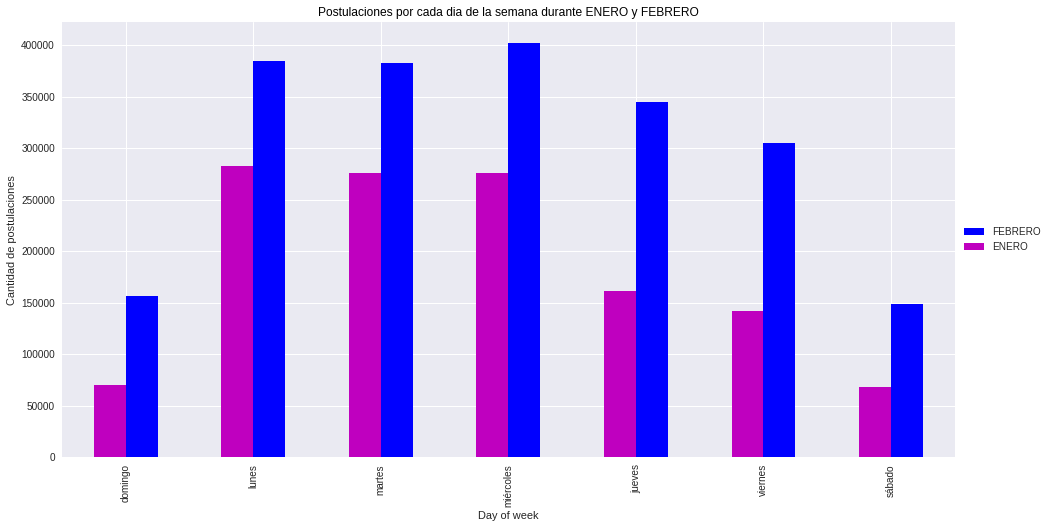

In [30]:
#elimino la columna day_id 
selecc_postulaciones=selecc_postulaciones[['ENERO','FEBRERO' ]]
f = plt.figure()
plt.title('Postulaciones por cada dia de la semana durante ENERO y FEBRERO', color='black')
ax = selecc_postulaciones.plot(kind='bar', stacked=False,figsize=(16,8),ax=f.gca(),color=['m','b'])
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1],loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.set_ylabel('Cantidad de postulaciones');
ax.set_xlabel('Day of week');
plt.show()

**_8. grafico boxplot de visitas dia por hora_**
===================================================

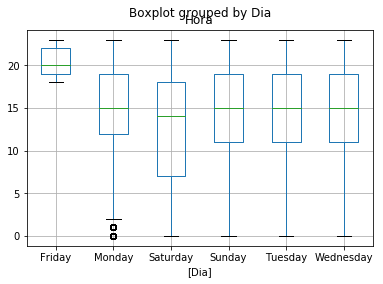

In [45]:
visi3=vistasFebrero[['Dia','Hora']]
visi3.boxplot(by='Dia')

## **Conclusión**:
###  Vemos que la mediana en horas los viernes es de 20 hrs, mientras que los otros dias es 15 hrs(excepto el sabado) vemos que en el sabado la  parte baja de la caja es mayor que la de arriba; ello quiere decir que las horas  comprendidas entre el 25% y el 50% de ese dia está más dispersa que entre el 50% y el 75%,idem con el viernes, y en los demas la mediana esta en el centro y es simetrica la distribucion de horas


**9. Hora en el dia que mas se postulan**
==========================================

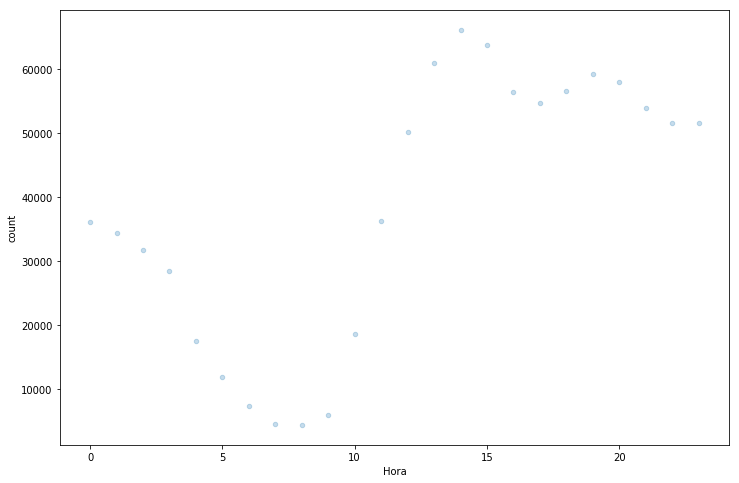

In [46]:
visualizacionvistasporhora=visualizacionVistasPorDia.groupby('Hora')['idpostulante'].agg(['count']).reset_index()

visualizacionvistasporhora.plot.scatter('Hora','count',alpha=0.25,figsize=(12,8));

## **Conclusión:**
## Alcanza un pico en las 15 horas, mientras que entre las 5 y 10 horas son las que menos se postulan.

### A partir de los dataFrames avisosCABA_GBA, postulantes y postulaciones obtengo un unico dataFrame con el cual vamos a trabajar de ahora en adelante

Primero mergeamos los dataFrames postulaciones y postulantes por el campo "idpostulante"


In [6]:
data = pd.merge(postulantes, postulaciones, on='idpostulante', how='outer')
data.head()

,idpostulante,nombre,estado,fechanacimiento,sexo,idaviso,fechapostulacion
0,NdJl,Posgrado,En Curso,1969-05-09,MASC,1112261212,2018-01-16 08:50:30
1,NdJl,Posgrado,En Curso,1969-05-09,MASC,1112273308,2018-01-23 07:53:47
2,NdJl,Posgrado,En Curso,1969-05-09,MASC,1112281548,2018-01-24 05:10:12
3,NdJl,Posgrado,En Curso,1969-05-09,MASC,1112260409,2018-01-24 05:17:29
4,NdJl,Posgrado,En Curso,1969-05-09,MASC,1112293547,2018-01-29 15:41:43


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5630562 entries, 0 to 5630561
Data columns (total 10 columns):
idpostulante        object
nombre              object
estado              object
fechanacimiento     object
sexo                object
idaviso             int64
fechapostulacion    datetime64[ns]
Year                int64
Month               int64
Day                 int64
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 472.5+ MB


Y ahora mergeamos el dataFrame anterior con avisos por el campo "idaviso"s 

In [7]:
dataFrame = pd.merge(data, avisos, on='idaviso', how='outer')

dataFrame.head()

,idpostulante,nombre,estado,fechanacimiento,sexo,idaviso,fechapostulacion,idpais,titulo,descripcion,nombre_zona,ciudad,mapacalle,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa
0,NdJl,Posgrado,En Curso,1969-05-09,MASC,1112261212,2018-01-16 08:50:30,1.0,Jóvenes Profesionales - Responsable Administra...,<p>Nos encontramos en la búsqueda de un<strong...,Gran Buenos Aires,NaN,NaN,Full-time,Jefe / Supervisor / Responsable,Administración,EDUCADO EN ARGENTINA
1,NdJl,Universitario,Graduado,1969-05-09,MASC,1112261212,2018-01-16 08:50:30,1.0,Jóvenes Profesionales - Responsable Administra...,<p>Nos encontramos en la búsqueda de un<strong...,Gran Buenos Aires,NaN,NaN,Full-time,Jefe / Supervisor / Responsable,Administración,EDUCADO EN ARGENTINA
2,EppJmb,Universitario,En Curso,1960-06-20,MASC,1112261212,2018-01-16 18:51:39,1.0,Jóvenes Profesionales - Responsable Administra...,<p>Nos encontramos en la búsqueda de un<strong...,Gran Buenos Aires,NaN,NaN,Full-time,Jefe / Supervisor / Responsable,Administración,EDUCADO EN ARGENTINA
3,EppJmb,Universitario,Graduado,1960-06-20,MASC,1112261212,2018-01-16 18:51:39,1.0,Jóvenes Profesionales - Responsable Administra...,<p>Nos encontramos en la búsqueda de un<strong...,Gran Buenos Aires,NaN,NaN,Full-time,Jefe / Supervisor / Responsable,Administración,EDUCADO EN ARGENTINA
4,8Zr1GD,Terciario/Técnico,En Curso,1975-06-29,MASC,1112261212,2018-01-17 10:08:22,1.0,Jóvenes Profesionales - Responsable Administra...,<p>Nos encontramos en la búsqueda de un<strong...,Gran Buenos Aires,NaN,NaN,Full-time,Jefe / Supervisor / Responsable,Administración,EDUCADO EN ARGENTINA


A partir de ahora vamos a trabajar con este dataFrame, el cual contiene la informacion de los anteriores

### Verificamos sus tipos

In [51]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5632866 entries, 0 to 5632865
Data columns (total 20 columns):
idpostulante            object
nombre                  object
estado                  object
fechanacimiento         object
sexo                    object
idaviso                 int64
fechapostulacion        datetime64[ns]
Year                    float64
Month                   float64
Day                     float64
idpais                  float64
titulo                  object
descripcion             object
nombre_zona             object
ciudad                  object
mapacalle               object
tipo_de_trabajo         object
nivel_laboral           object
nombre_area             object
denominacion_empresa    object
dtypes: datetime64[ns](1), float64(4), int64(1), object(14)
memory usage: 902.5+ MB


### Agrupamos todos los avisos que corresponden al mismo area y vemos cuales son las que cuentan con mayor cantidad de publicaciones.


In [8]:
dataFrame.groupby('nombre_area')['idaviso'].count().sort_values(ascending = False).head()

nombre_area
Ventas                 656473
Administración         520098
Comercial              370672
Producción             367181
Atención al Cliente    331374
Name: idaviso, dtype: int64

Visualizamos los resultados con un grafico de  barras

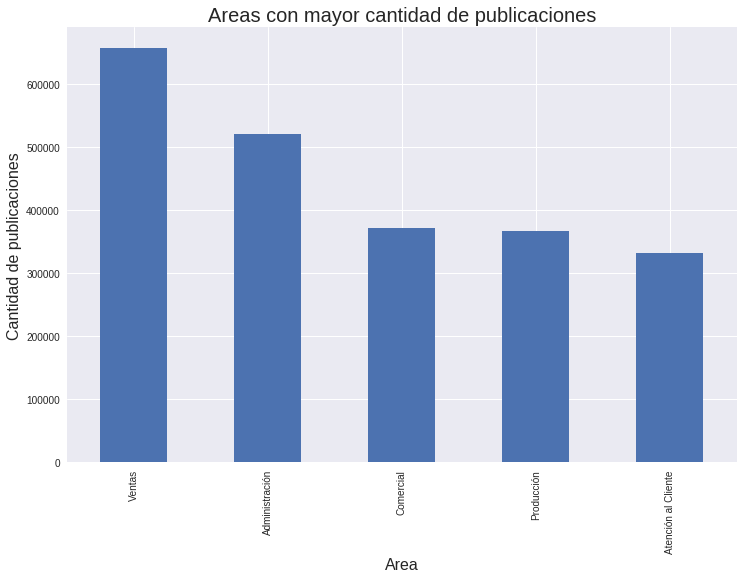

In [9]:

dataFrame.groupby('nombre_area')['idaviso'].agg('count').sort_values(ascending = False)[0:5].plot(kind='bar', rot=90, figsize=(12,8));

plt.title('Areas con mayor cantidad de publicaciones', fontsize=20);
plt.xlabel('Area', fontsize=16);
plt.ylabel('Cantidad de publicaciones', fontsize=16);

### Nos interesaria ver la cantidad de publicaciones que tenemos segun la disponibilidad horaria de los postulantes

Para ellos agrupamos por la columna "tipo_de_trabajo", y luego contamos la cantidad de avisos que hay de cada tipo (Full-time, Part-time y otros)

In [10]:
dataFrame.groupby('tipo_de_trabajo')['idaviso'].count().sort_values(ascending  = False).head()

tipo_de_trabajo
Full-time     4363571
Part-time      662800
Pasantia        27988
Por Horas       17446
Temporario      15205
Name: idaviso, dtype: int64

Eliminamos las que tienen el campo "tipo_de_trabajo" nulo


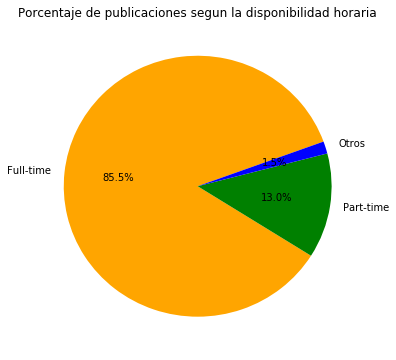

In [55]:
disponibilidades_horarias = dataFrame

disponibilidades_horarias.dropna(subset=['tipo_de_trabajo'],inplace=True)

full_time = disponibilidades_horarias.loc[disponibilidades_horarias.tipo_de_trabajo.str.contains('Full-time'),:]

part_time = disponibilidades_horarias.loc[disponibilidades_horarias.tipo_de_trabajo.str.contains('Part-time'),:]

otros = disponibilidades_horarias.loc[~(disponibilidades_horarias.tipo_de_trabajo.str.contains('Full-time|Part-time')),:]

sizes = [len(full_time), len(part_time), len(otros)]
nombres = ['Full-time', 'Part-time', 'Otros']

plt.figure(figsize=(6, 6))
plt.title('Porcentaje de publicaciones segun la disponibilidad horaria', fontsize=12)
plt.pie(sizes, labels=nombres, autopct='%1.1f%%', startangle=20, colors=['orange','green','blue'])
plt.show()

### ¿Cuales son los avisos a las que mas personas se postulan? 
Agrupamos por el titulo del aviso, su id y la denominacion de empresa

In [18]:
dataFrame.groupby(['titulo','idaviso','denominacion_empresa'])['idpostulante'].count().sort_values(ascending = False).head()

titulo                                       idaviso     denominacion_empresa  
Representante de Atencion al Cliente/ Banco  1112094756  RANDSTAD                  15935
Asesores de Atención al Público - Part time  1112345900  Universidad de Palermo    15171
Cajero/a - Part Time                         1112334791  Farmacity                 15115
Cajero/a-Repositor/a (Capital Federal)       1112033906  Farmacity                 14987
Cajero/a - Part Time                         1112204682  Farmacity                 14160
Name: idpostulante, dtype: int64

Viendo los resultados, podriamos decir que hay avisos que estan duplicados. O sea que la empresa publico en una o mas ocasiones la misma busqueda laboral. Entonces podriamos agrupar simplemente todas los avisos que tengan el mismo titulo y que pertenezcan a la misma empresa (descartanto el idaviso)

In [57]:
dataFrame.groupby(['titulo','denominacion_empresa'])['idpostulante'].count().sort_values(ascending = False).head()

titulo                                       denominacion_empresa  
Cajero/a - Part Time                         Farmacity                 29275
Cajero/a-Repositor/a (Capital Federal)       Farmacity                 25184
Representante de Atencion al Cliente/ Banco  RANDSTAD                  15935
Asesor/a de Belleza - Part Time              Farmacity                 15879
Asesores de Atención al Público - Part time  Universidad de Palermo    15171
Name: idpostulante, dtype: int64

Por lo cual, ahora los resultados cambian. Siendo la busqueda de Cajero/a - Part Time de Farmacity la que mas postulaciones tiene.

Visualizamos los resultados

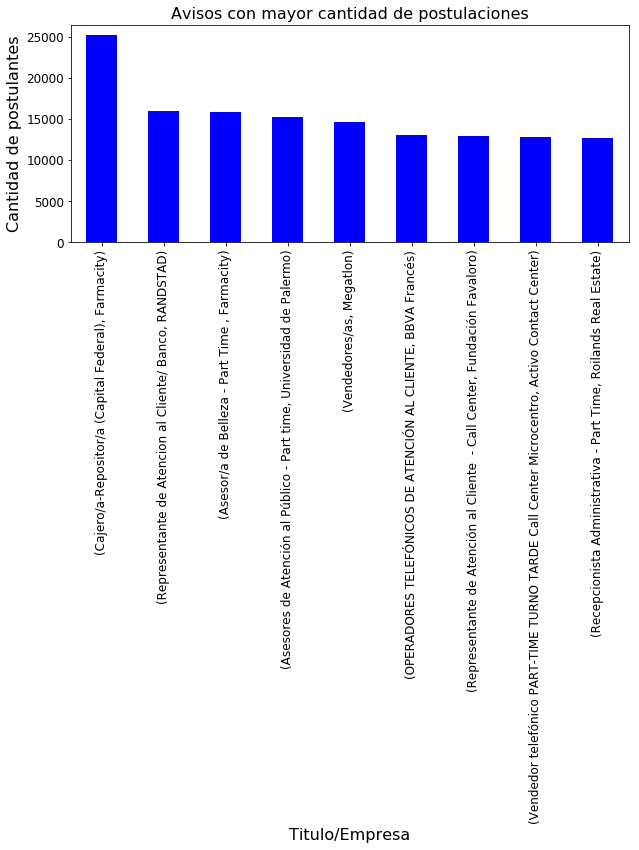

In [58]:
dataFrame.groupby(['titulo','denominacion_empresa'])['idpostulante'].count().sort_values(ascending = False)[1:10].plot(kind='bar',rot = 90,figsize=(10,4),color='blue',fontsize=12)

plt.title('Avisos con mayor cantidad de postulaciones', fontsize=16);
plt.xlabel('Titulo/Empresa', fontsize=16);
plt.ylabel('Cantidad de postulantes', fontsize=16);

### Area con postulantes con nivel educativo mas alto  


Primero vemos cuales son los niveles educativos que existen

In [66]:

dataFrame.groupby('nombre')['idpostulante'].count().sort_values(ascending = False).head(10)


nombre
Secundario           1854451
Universitario        1747126
Terciario/Técnico     786795
Otro                  460616
Posgrado              106742
Master                 53185
Doctorado               3257
Name: idpostulante, dtype: int64

Vemos que encabeza la lista los postulantes con nivel secundario (Ya sea en curso o terminado). Y luego de la lista podemos decir que el doctorado es el grado mas alto que se puede tener. Entonces vamos enfocarnos en este, para ver a cuales areas son las que mas se postulan

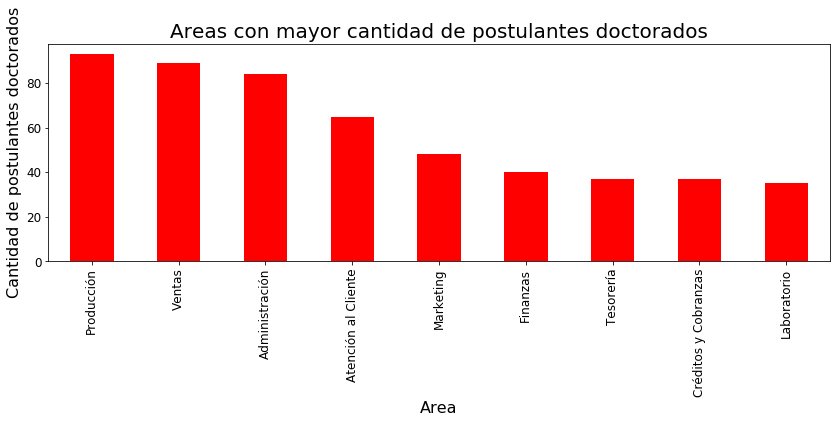

In [67]:
doctorado = dataFrame.loc[(dataFrame.nombre.str.contains('Doctorado') & dataFrame.estado.str.contains('Graduado')),:]

doctorado.groupby('nombre_area')['idpostulante'].count().sort_values(ascending = False)[1:10].plot(kind='bar',rot = 90,figsize=(14,4),color='red',fontsize=12)

plt.title('Areas con mayor cantidad de postulantes doctorados', fontsize=20);
plt.xlabel('Area', fontsize=16);
plt.ylabel('Cantidad de postulantes doctorados', fontsize=16);

 ### ¿Cual es el sexo con mayor cantidad de postulantes?

In [78]:
genero_y_edad = postulantesGeneroYEdad 

In [79]:
IDs_duplicados = sum(genero_y_edad.idpostulante.value_counts()>1)
IDs_duplicados


0

In [80]:
genero_y_edad = genero_y_edad.groupby('sexo')['idpostulante'].agg(['count']) 


In [81]:
genero_y_edad

,count
sexo,
FEM,101981
MASC,94339
NO_DECLARA,4568


Text(0.5,0,'Sexo')

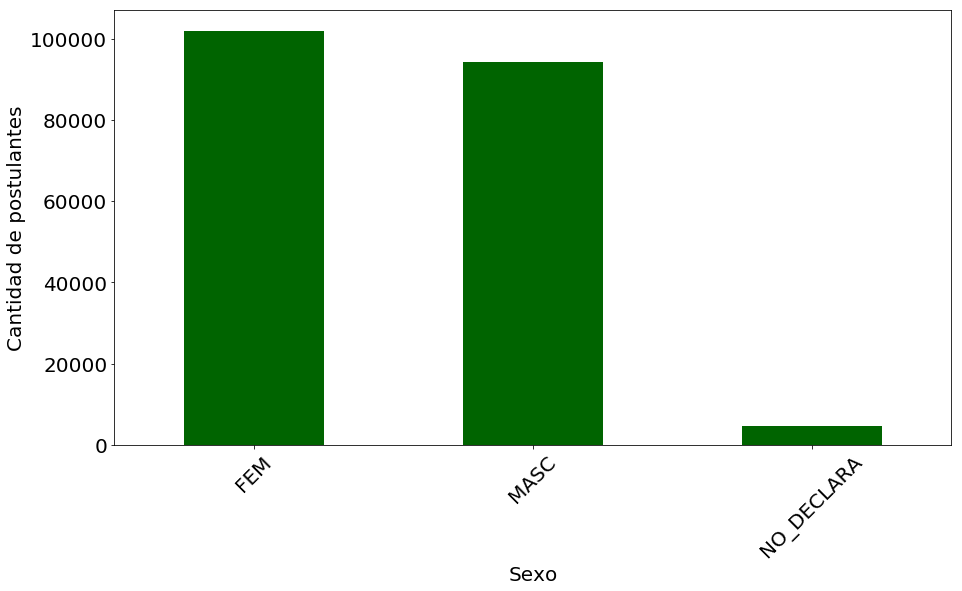

In [82]:
grafico = genero_y_edad.plot(kind = "bar",\
                            color =["darkgreen","seagreen","limegreen","lightgreen"] ,\
                            fontsize=20,figsize = (15,8), rot = 45, legend = False)
grafico.set_title('')
grafico.set_ylabel("Cantidad de postulantes", fontsize=20)
grafico.set_xlabel("Sexo", fontsize = 20)

Por lo cual se puede ver que la mujeres se postulan en mayor cantidad que los hombres

###  Sexo con mayor cantidad de postulaciones (En los meses de Enero y Febrero de 2018)

In [14]:
postulacionesa = postulaciones
postulacionesa.tail()

,idaviso,idpostulante,fechapostulacion
3401618,1111753681,0zPa0eq,2018-02-28 23:54:44
3401619,1112369306,2zP6Jd0,2018-02-28 23:57:43
3401620,1112308651,8MPoxDW,2018-02-28 23:52:13
3401621,1112341128,8MPoxDW,2018-02-28 23:59:06
3401622,1112369825,2zP6J9V,2018-02-28 23:56:10


Agregamos la columna año luego de splitearla


In [15]:
prop_fecha = postulacionesa['fechapostulacion'].str.split(' ',3,expand=True) 
a=prop_fecha[0].str.split('-',3,expand=True)
 
postulacionesa['year']=a[0]
postulacionesa['month']=a[1]
postulacionesa['day']=a[2]
postulacionesa = postulacionesa


In [16]:
postulacionesa.month.value_counts()


02    2125425
01    1276198
Name: month, dtype: int64

Vemos que son los meses de enero y febrero

In [17]:
postulacionesa.year.value_counts()


2018    3401623
Name: year, dtype: int64

Y solo del 2018

In [87]:
IDs_duplicados=sum(postulacionesa.idpostulante.value_counts()>1)
IDs_duplicados


180941

Vemos que hay duplicados en postulaciones

In [90]:
postulantes_sexo=pd.merge(postulaciones,postulantesGeneroYEdad,on='idpostulante' , how='inner')
postulantes_sexo.tail()

,idaviso,idpostulante,fechapostulacion,Year,Month,Day,fechanacimiento,sexo
3401618,1111753681,0zPa0eq,2018-02-28 23:54:44,2018,2,28,1998-05-09,FEM
3401619,1112369306,2zP6Jd0,2018-02-28 23:57:43,2018,2,28,1997-03-06,FEM
3401620,1112308651,8MPoxDW,2018-02-28 23:52:13,2018,2,28,1997-07-07,MASC
3401621,1112341128,8MPoxDW,2018-02-28 23:59:06,2018,2,28,1997-07-07,MASC
3401622,1112369825,2zP6J9V,2018-02-28 23:56:10,2018,2,28,NaN,NO_DECLARA


In [91]:
postulantes_sexo2=postulantes_sexo 

In [92]:
postulantes_sexo.groupby('sexo')['idpostulante'].agg(['count'])

,count
sexo,
FEM,1688939
MASC,1668601
NO_DECLARA,44083


In [93]:
postulantes_sexo=postulantes_sexo.groupby('sexo')['idpostulante'].agg(['count'])

Text(0.5,0,'Sexo')

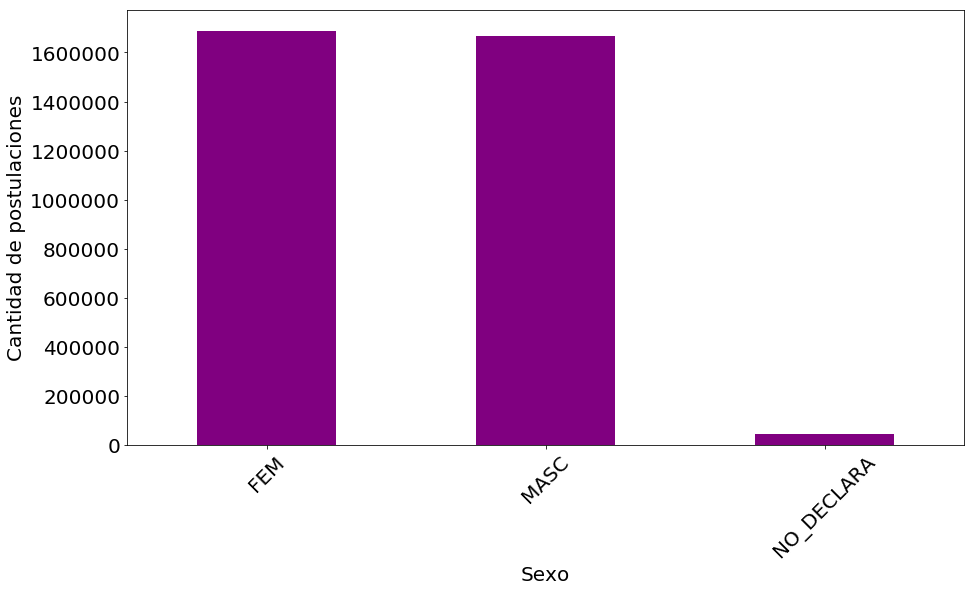

In [94]:
graico =postulantes_sexo.plot(kind = "bar",\
                            color = "Purple" ,\
                            fontsize=20,figsize = (15,8), rot = 45, legend = False)
graico.set_title('')
graico.set_ylabel("Cantidad de postulaciones", fontsize=20)
graico.set_xlabel("Sexo", fontsize = 20)

La cantidad de mujeres que se postulan (una o mas veces) es mayor por un margen minimo a los hombres o los que no declaran sexo

###  Sexo con mayor cantidad de postulados (SIN REPETIR) (En los meses de Enero y Febrero de 2018) 

In [95]:
postulantes_sexo_sinrepeticiones=postulantes_sexo2.drop_duplicates(subset=['idpostulante'], keep=False).reset_index()


In [96]:
IDs_duplicados=sum(postulantes_sexo_sinrepeticiones.idpostulante.value_counts()>1)
IDs_duplicados

0

In [97]:
postulantes_sexo_sinrepeticiones.groupby('sexo')['idpostulante'].agg(['count']).sort_values(by='count',ascending = False)

,count
sexo,
FEM,9909
MASC,9232
NO_DECLARA,806


In [98]:
postulantes_sexo_sinrepeticiones=postulantes_sexo_sinrepeticiones.groupby('sexo')['idpostulante'].agg(['count']).sort_values(by='count',ascending = False)

Text(0.5,0,'Sexo')

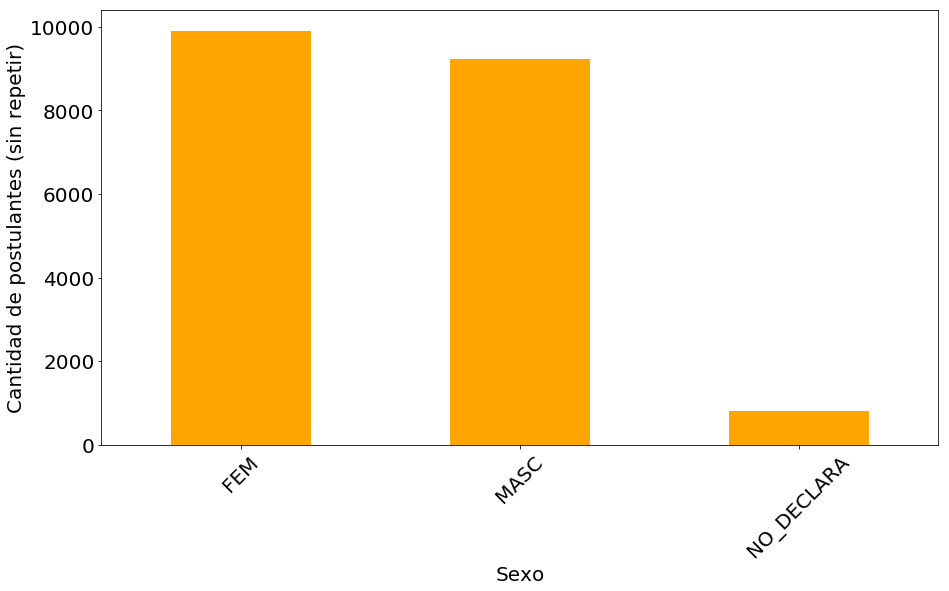

In [99]:
grafico=postulantes_sexo_sinrepeticiones.plot(kind = "bar",\
                            color = "Orange" ,\
                            fontsize=20,figsize = (15,8), rot = 45, legend = False)

grafico.set_title("")
grafico.set_ylabel("Cantidad de postulantes (sin repetir)", fontsize=20)
grafico.set_xlabel("Sexo", fontsize = 20)

Las mujeres se postularon mas ese mes (Sin repetir postulaciones)

### Sexo con mayor cantidad de visitas (Febrero de 2018)

In [103]:
sexo_visitas=pd.merge(vistas,postulantesGeneroYEdad,on='idpostulante' , how='inner')


Text(0.5,0,'Sexo')

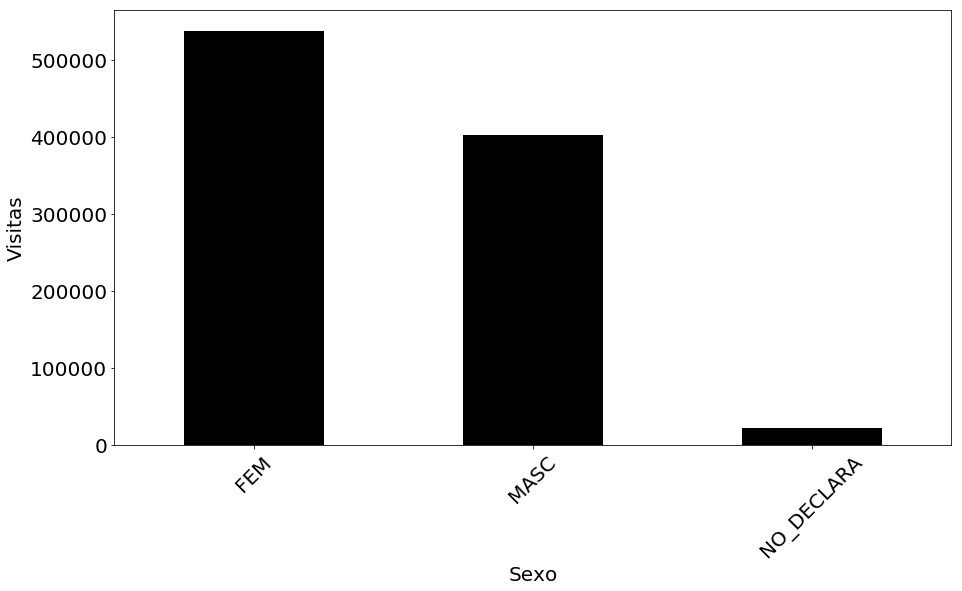

In [104]:
sexo_sitas=sexo_visitas.groupby('sexo')['idpostulante'].agg(['count']).sort_values(by='count',ascending = False).plot(kind = "bar",\
                            color = "Black" ,\
                            fontsize=20,figsize = (15,8), rot = 45, legend = False)

sexo_sitas.set_title("")
sexo_sitas.set_ylabel("Visitas", fontsize=20)
sexo_sitas.set_xlabel('Sexo', fontsize = 20) 

Fueron las mjueres las que mas visitaron los avisos

 ### Nivel de estudio (ya sea en curso o terminado) de las personas que estan postulados

In [106]:
educacion2=postulantesEducacion

In [107]:
IDs_duplicados=sum(educacion2.idpostulante.value_counts()>1)
IDs_duplicados

80276

In [108]:
educacion2.estado.value_counts()

Graduado      194474
En Curso       78531
Abandonado     25226
Name: estado, dtype: int64

significa que el postulantes podrian haber dejado la carrera, cambiado o comenzado una nueva, 
Por eso hay duplicados

In [109]:
postulaciones3=postulaciones

In [110]:
postulantessinrepeticiones=postulaciones3.drop_duplicates(subset=['idpostulante'], keep=False).reset_index()
#Queremos los que se postulan, por eso eliminamos repetidos

In [113]:
postulantes_nivelestudio=pd.merge( postulantessinrepeticiones,postulantesEducacion,on='idpostulante' , how='inner')

In [114]:
postulantes_nivelestudio.groupby('nombre')['idpostulante'].agg(['count']).sort_values(by='count',ascending = False)

,count
nombre,
Universitario,9278
Secundario,9193
Terciario/Técnico,4436
Otro,1750
Posgrado,789
Master,363
Doctorado,27


Text(0,0.5,'Nivel de Estudio')

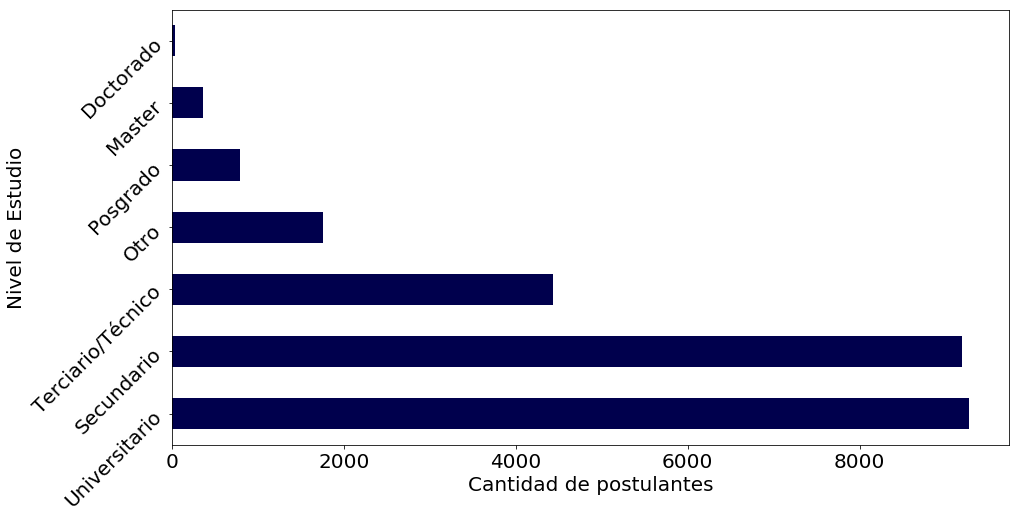

In [115]:
postulantes_nivelestudio=postulantes_nivelestudio.groupby('nombre')['idpostulante'].agg(['count']).sort_values(by='count',ascending = False)
my_colors = [(x/10.0, x/20.0, 0.30) for x in range(len(postulantes_nivelestudio))] # <-- Quick gradient example along the Red/Green dimensions.
grafico =postulantes_nivelestudio.plot(kind = "barh",\
                            color = my_colors ,\
                            fontsize=20,figsize = (15,8), rot = 45, legend = False)

grafico.set_title("")
grafico.set_xlabel('Cantidad de postulantes', fontsize=20);
grafico.set_ylabel("Nivel de Estudio", fontsize=20)

El nivel de estudio mas popular entre los postulados fueron el universitario

### Y el tipo de trabajo al que mas se postularon

In [118]:
postulantes_trabajo=pd.merge(postulaciones,avisosDetalle,on='idaviso' , how='inner')
postulantes_trabajo.tail(10)

,idaviso,idpostulante,fechapostulacion,Year,Month,Day,idpais,titulo,descripcion,nombre_zona,ciudad,mapacalle,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa
3074196,1112358649,W9A98JR,2018-02-24 07:46:02,2018,2,24,1,"Desarrollador FullStack Sr con Java, Mentor pa...",Position: Web and Mobile Development Senior me...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Programación,MindHub
3074197,1112207996,ZDl1Y25,2018-01-18 15:04:58,2018,1,18,1,Ingeniero Agrónomo Comercial,<p>Nos encontramos en la búsqueda de un Ingeni...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Ventas,SitioLinks
3074198,1112215478,5mPLovN,2018-01-15 11:49:08,2018,1,15,1,Laminador de Prfv (plástico reforzado con fibr...,"<p>Imporante empresa en zona norte incorpora, ...",Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Producción,Pullmen Servicios Empresarios S.A.
3074199,1112206214,Bm543E2,2018-01-16 13:01:52,2018,1,16,1,Analista Junior de RRHH - Resistencia,<p>Nos encontramos en la búsqueda de un ANALIS...,Gran Buenos Aires,NaN,NaN,Full-time,Junior,Recursos Humanos,Consultora de Recursos Humanos
3074200,1112204918,EzeGQYo,2018-01-16 09:02:50,2018,1,16,1,Gestor Comercial - Grupo Meditel,"<p style="""">Grupo Meditel busca incorporar par...",Gran Buenos Aires,NaN,NaN,Part-time,Senior / Semi-Senior,Ventas,MEDITEL
3074201,1112205943,PmGYxxj,2018-01-16 10:57:48,2018,1,16,1,Ingeniero Vial,<p>Importante empresa Constructora busca Ingen...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Construcción,Ezentya Consultora en RR.HH.
3074202,1112342094,dYJV5K2,2018-02-25 04:48:24,2018,2,25,1,Desarrolladores JAVA SOA / JBOSS RED HAT // Zo...,<p><strong>SOLUTIX</strong> está en la búsqued...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Programación,SOLUTIX S.A.
3074203,1112206295,xkdOVkx,2018-01-15 09:05:45,2018,1,15,1,Farmacutico,<p>HELIOS SALUD se encuentra en la búsqueda de...,Capital Federal,NaN,San Telmo,Full-time,Senior / Semi-Senior,Farmacéutica,HELIOS SALUD
3074204,1111378594,NzrwXm4,2018-01-15 19:54:21,2018,1,15,1,We are looking for a Actionscript Developer to...,<div>Globant's Gaming Studio works with the to...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Tecnologia / Sistemas,Globant
3074205,1112209328,ow2151r,2018-01-15 09:57:21,2018,1,15,1,Operarios con secundario técnico Z/Lanús,<p>Estamos en la búsqueda de operarios con sec...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Producción,Pullmen Servicios Empresarios S.A.


In [119]:
postulantes_trabajo.groupby('tipo_de_trabajo')['idpostulante'].agg(['count']).head() 

,count
tipo_de_trabajo,
Fines de Semana,1900
Full-time,2633145
Part-time,394677
Pasantia,15457
Por Contrato,3826


Text(0,0.5,'Tipo de Trabajo al que se postularon')

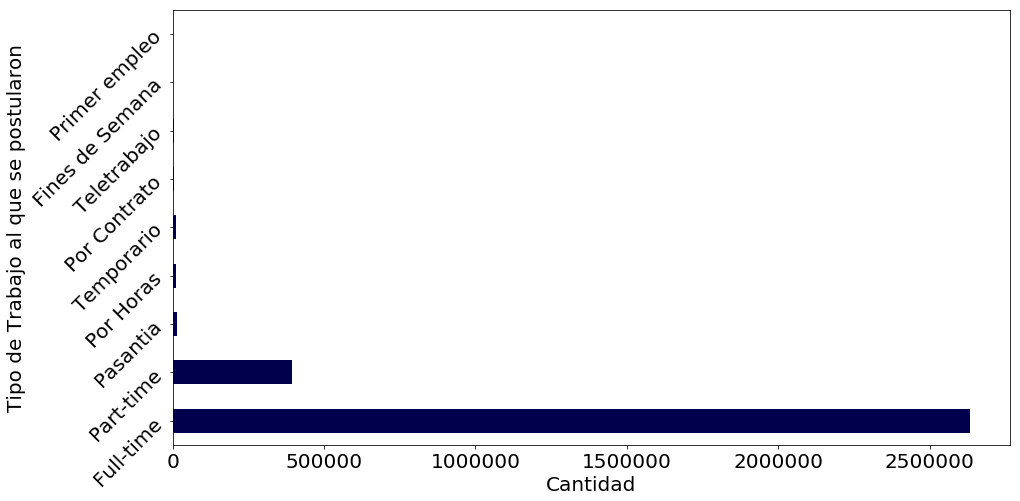

In [120]:
postulantes_trabajo=postulantes_trabajo.groupby('tipo_de_trabajo')['idpostulante'].agg(['count']).sort_values(by='count',ascending = False)
my_colors = [(x/10.0, x/20.0, 0.30) for x in range(len(postulantes_trabajo))] # <-- Quick gradient example along the Red/Green dimensions.
grafico = postulantes_trabajo.plot(kind = "barh",\
                            color = my_colors ,\
                            fontsize=20,figsize = (15,8), rot = 45, legend = False)

grafico.set_title("")
grafico.set_xlabel('Cantidad', fontsize=20);
grafico.set_ylabel("Tipo de Trabajo al que se postularon", fontsize=20)

El tipo de trabajo que mas se postularon fue el Full-Time